# Jeremy Ferlic - Data Challenge #1

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load in Data

In [2]:
# Read in data frame
dat = pd.read_csv("employee_retention_data.csv")

# Massage date-time objects and categorize department into dept_id
dat['join_date'] = pd.to_datetime(dat['join_date'])
dat['quit_date'] = pd.to_datetime(dat['quit_date'])
dat['dept'] = dat['dept'].astype('category')
dat['dept_id'] = dat['dept'].cat.codes

# Print out some basic information about the dataset
print(dat.shape)
print()
print(dat.dtypes)
print()
print(dat.head())

(24702, 8)

employee_id           float64
company_id              int64
dept                 category
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dept_id                  int8
dtype: object

   employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  dept_id  
0 2015-10-30        0  
1 2014-04-04        4  
2        NaT        4  
3 2013-06-07        0  
4 2014-08-22        1  


## Feature Engineering

In [3]:
# Create binary has employee left
dat['has_left'] = dat['quit_date'].notnull()

# See how long the people who have left have been working
dat['days_worked'] = dat['quit_date'] - dat['join_date']

# Separate out join_date information
dat['join_month'] = dat['join_date'].dt.strftime('%B')
dat['join_year'] = dat['join_date'].dt.strftime('%Y')

# Print some example rows of new data
print(dat.head())

   employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  dept_id  has_left days_worked join_month join_year  
0 2015-10-30        0      True    585 days      March      2014  
1 2014-04-04        4      True    340 days      April      2013  
2        NaT        4     False         NaT    October      2014  
3 2013-06-07        0      True    389 days        May      2012  
4 2014-08-22        1      True   1040 days    October      2011  


## Data Summarization

In [4]:
print("Overall leave rate: %f" % dat['has_left'].mean())

Overall leave rate: 0.546919


In [5]:
# Simple summaries of numeric values
dat.describe()

,employee_id,company_id,seniority,salary,dept_id,days_worked
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,13510
mean,501604.403530,3.426969,14.127803,138183.345478,1.955995,613 days 11:41:01.643227
std,288909.026101,2.700011,8.089520,76058.184573,1.862562,328 days 14:56:33.800149
min,36.000000,1.000000,1.000000,17000.000000,0.000000,102 days 00:00:00
25%,250133.750000,1.000000,7.000000,79000.000000,0.000000,361 days 00:00:00
50%,500793.000000,2.000000,14.000000,123000.000000,1.000000,417 days 00:00:00
75%,753137.250000,5.000000,21.000000,187000.000000,4.000000,781 days 00:00:00
max,999969.000000,12.000000,99.000000,408000.000000,5.000000,1726 days 00:00:00


In [6]:
# Summarize some information by company
print(dat.groupby('company_id').count())
print()
print(dat.groupby('company_id').mean())
print()
print(dat.groupby('company_id')[['seniority']].describe())

            employee_id  dept  seniority  salary  join_date  quit_date  \
company_id                                                               
1                  8486  8486       8486    8486       8486       4621   
2                  4222  4222       4222    4222       4222       2206   
3                  2749  2749       2749    2749       2749       1531   
4                  2062  2062       2062    2062       2062       1153   
5                  1755  1755       1755    1755       1755        983   
6                  1291  1291       1291    1291       1291        712   
7                  1224  1224       1224    1224       1224        692   
8                  1047  1047       1047    1047       1047        579   
9                   961   961        961     961        961        529   
10                  865   865        865     865        865        480   
11                   16    16         16      16         16         12   
12                   24    24         

There are possibly some seniority outliers in company 1 and company 10, with seniorities 99 and 98 respectively.

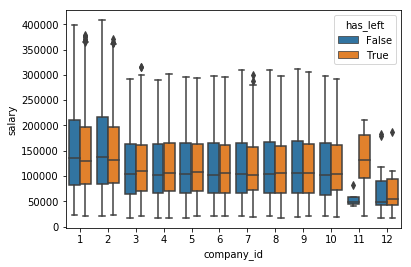

In [7]:
# Boxplot of salary for each company, split into groups of employees who remain and have left
sns.boxplot(x='company_id', y='salary', hue='has_left', data = dat)

There doesn't seem to be a strong visual trend that the salary distributions differ between those who stay and leave in an individual company.

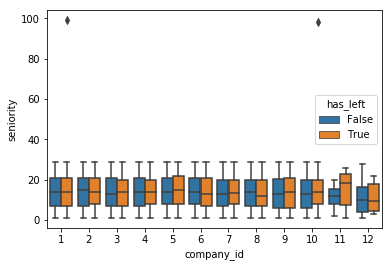

In [8]:
# Boxplot of seniority for each company, split into groups of employees who remain and have left
sns.boxplot(x='company_id', y='seniority', hue='has_left', data = dat)

Again, there do not seem to be major differences in seniority between those who have left and those who stay.  Note: Here we can clearly see the two seniority outliers previously mentioned.

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'dept_id', 'has_left'],
      dtype='object')


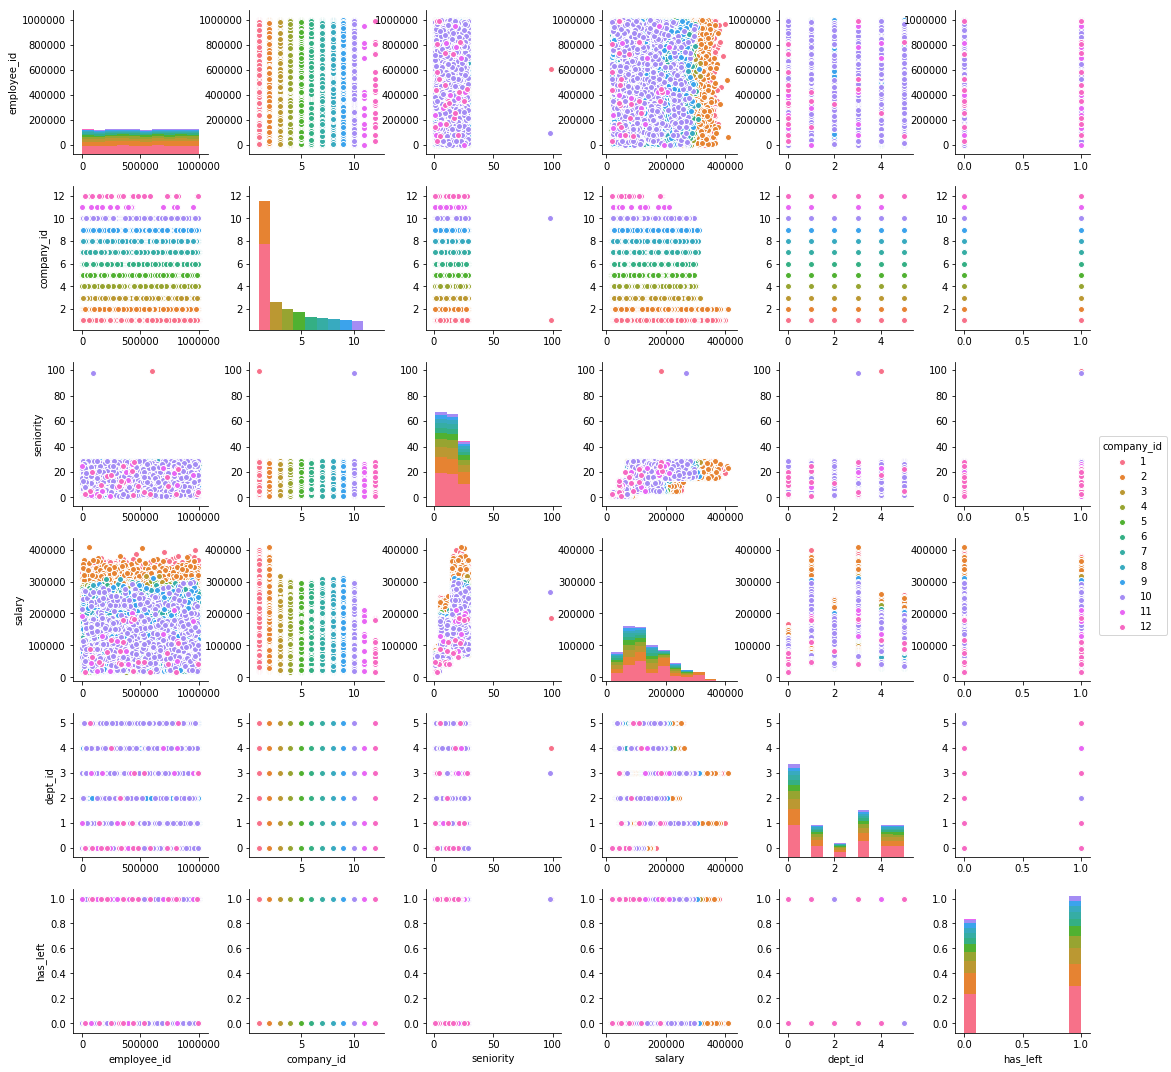

In [9]:
# Pair plots across dataset colored by company ID
i = 9
print(dat.columns[0:i])
g = sns.pairplot(dat.iloc[:,0:i], hue='company_id')

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'dept_id', 'has_left'],
      dtype='object')


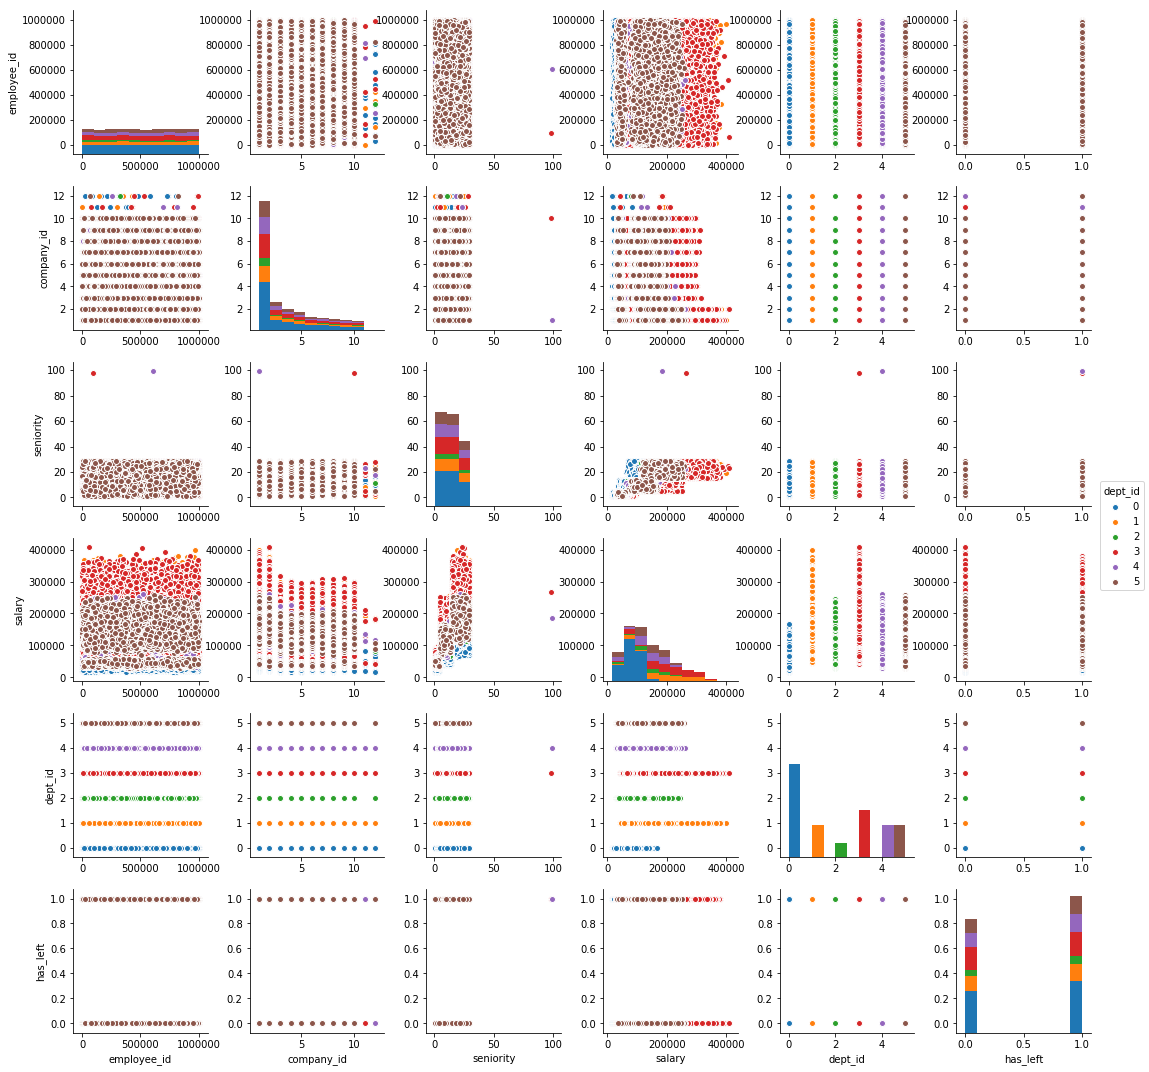

In [10]:
# Pair plots across dataset colored by department ID
i = 9
print(dat.columns[0:i])
g = sns.pairplot(dat.iloc[:,0:i], hue='dept_id')

## RandomForest Classifier

Here we will fit a RandomForest Classifier to see which factors are important in determining whether an employee stays or leaves a company.  Our binary outcome will be whether or not an employee has left.

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Add one-hot encoding for department and company IDs
df = pd.concat([dat, pd.get_dummies(dat['dept'])], axis = 1)
df = pd.concat([df, pd.get_dummies(dat['company_id'])], axis = 1)

# Add one-hot encoding of join year/month
df = pd.concat([df, pd.get_dummies(df['join_month'])], axis = 1)
df = pd.concat([df, pd.get_dummies(df['join_year'])], axis = 1)


# Drop some features that we don't wish to include in our regression
drop_feat = ['employee_id', 'company_id', 'dept', 'join_date', 'quit_date', 'has_left', 'days_worked', 'dept_id', 'join_year', 'join_month']
X = df.drop(drop_feat, axis = 1)

# Print out our features
print(X.columns)

# Outcome
y=dat['has_left'] 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Index([       'seniority',           'salary', 'customer_service',
           'data_science',           'design',         'engineer',
              'marketing',            'sales',                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11,                 12,            'April',
                 'August',         'December',         'February',
                'January',             'July',             'June',
                  'March',              'May',         'November',
                'October',        'September',             '2011',
                   '2012',             '2013',             '2014',
                   '2015'],
      dtype='object')


In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create classifier using 100 splits
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.767237889624
Precision: 0.765103802193
Recall: 0.820410205103


76.8% Accuracy, considering a base-line accuracy would be around 55% if we simply guessed that all employees had left.

In [14]:
# Look at which features are important
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

2015                0.221112
salary              0.201357
seniority           0.143729
2011                0.099987
2014                0.047659
2012                0.046551
2013                0.020804
1                   0.013757
2                   0.010988
3                   0.009747
December            0.008963
4                   0.008691
marketing           0.008237
5                   0.008153
October             0.007915
customer_service    0.007867
May                 0.007801
September           0.007739
engineer            0.007705
June                0.007677
data_science        0.007646
July                0.007631
August              0.007496
sales               0.007451
April               0.007053
6                   0.006958
January             0.006955
February            0.006915
March               0.006820
November            0.006769
7                   0.006763
8                   0.006383
9                   0.006329
design              0.006268
10            

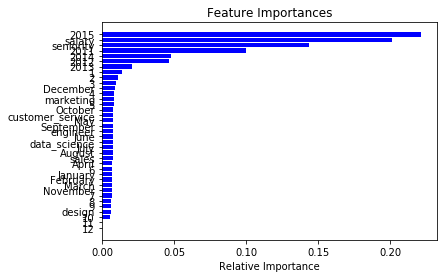

In [15]:
# Plot feature importances
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Overall, the important features tend to be when the employee joined the company, where employees who have been at the company for a longer time tend to be more likely to have left the company.  This makes sense intuitively and could potentially be seen as a bias (those individuals technically have had more "exposure time" for the event of "leaving their job").  Other important factors included salary and seniority.  The company seems to be relatively unimportant as well as the department an individual worked in and particular month they started in.

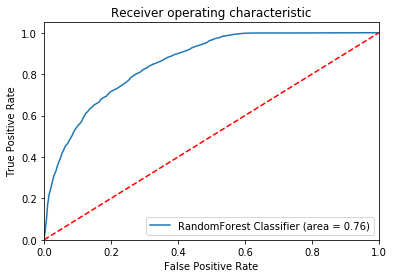

In [16]:
# ROC-curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logistic Regression

Trying to get a normal logistic regression to work... but having some trouble because I never get anyone classified as staying... I think this might have something to do with how I'm encoding the categorical variables.

In [17]:
import statsmodels.api as sm

X_logistic = X
y_logistic = dat['has_left']

drop_baseline = [1, 'customer_service', '2011', 'January']
X_logistic = X_logistic.drop(drop_baseline, axis = 1)
#X_logistic = X_logistic.iloc[:,:2]

logit_model=sm.Logit(y_logistic,X_logistic)
result=logit_model.fit()
print(X_logistic.columns)
print(result.summary())
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.445579
         Iterations 9
Index([   'seniority',       'salary', 'data_science',       'design',
           'engineer',    'marketing',        'sales',              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,        'April',       'August',
           'December',     'February',         'July',         'June',
              'March',          'May',     'November',      'October',
          'September',         '2012',         '2013',         '2014',
               '2015'],
      dtype='object')
                           Logit Regression Results                           
Dep. Variable:               has_left   No. Observations:                24702
Model:                          Logit   Df Residuals:                    24669
Method:                           MLE   Df Mode

/home/jeremy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_Tryingtrain, y_test = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=4)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(X_train.shape)

(17291, 33)


In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0 3352]
 [   0 4059]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      3352
       True       0.55      1.00      0.71      4059

avg / total       0.30      0.55      0.39      7411



/home/jeremy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


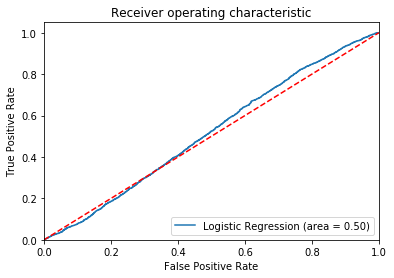

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()